In [10]:
key = pd.read_csv("data/key.csv")
key.tail()

,store_nbr,station_nbr
40,41,12
41,42,14
42,43,11
43,44,12
44,45,16


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:186: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


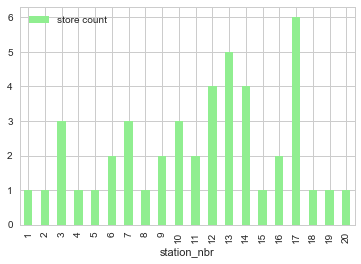

In [25]:
k = key.groupby("station_nbr").size().reset_index()
k.plot.bar(x='station_nbr', y=0, label="store count", colors='lightgreen')
plt.show()

In [1]:
weather = pd.read_csv("weather_imputation.csv")
weather['date'] = pd.to_datetime(weather['date'])
weather.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day
20512,16,2014-10-31,53.0,34.0,44.0,NaN,35.0,41.0,21.0,0.0,...,NaN,0.00,29.90,29.99,4.5,3.0,5.3,2014,10,31
20513,17,2014-10-31,59.0,34.0,47.0,NaN,32.0,41.0,18.0,0.0,...,0.0,0.00,29.72,30.39,9.2,1.0,9.3,2014,10,31
20514,18,2014-10-31,67.0,49.0,58.0,-4.0,40.0,50.0,7.0,0.0,...,0.0,0.00,29.78,30.28,10.6,36.0,11.2,2014,10,31
20515,19,2014-10-31,45.0,33.0,39.0,-6.0,24.0,32.0,26.0,0.0,...,0.1,0.02,29.51,30.24,20.4,34.0,20.9,2014,10,31
20516,20,2014-10-31,68.0,50.0,59.0,NaN,39.0,50.0,6.0,0.0,...,0.0,0.00,29.57,30.27,10.5,36.0,11.2,2014,10,31


In [43]:
for i in range(1,21):
    if i == 1:
        wthr = pd.read_csv("station1_monthmean.csv")
    else:
        if i == 5:
            station = weather[weather['station_nbr']==5]
        else:
            station = pd.read_csv("station" + str(i) + "_monthmean.csv")
        wthr = pd.concat([wth,station], axis=0)
wthr.reset_index(drop=True, inplace=True)
wthr.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day
21547,20,2014-10-27,85.0,66.0,75.5,NaN,59.0,65.0,0.0,11.0,...,0.0,0.0,29.11,29.82,10.0,18.0,10.4,2014,10,27
21548,20,2014-10-28,80.0,68.0,74.0,NaN,60.0,65.0,0.0,9.0,...,0.0,0.0,29.30,29.97,3.1,36.0,6.4,2014,10,28
21549,20,2014-10-29,78.0,55.0,66.5,NaN,47.0,56.0,0.0,2.0,...,0.0,0.0,29.42,30.12,4.9,6.0,6.1,2014,10,29
21550,20,2014-10-30,80.0,52.0,66.0,NaN,50.0,57.0,0.0,1.0,...,0.0,0.0,29.40,30.11,1.6,14.0,4.9,2014,10,30
21551,20,2014-10-31,68.0,50.0,59.0,NaN,39.0,50.0,6.0,0.0,...,0.0,0.0,29.57,30.27,10.5,36.0,11.2,2014,10,31


In [44]:
import datetime as dt
# 상대습도 계산
wthr["relative_humility"] = 100*(np.exp((17.625*((wthr['dewpoint']-32)/1.8))/(243.04+((wthr['dewpoint']-32)/1.8)))/np.exp((17.625*((wthr['tavg']-32)/1.8))/(243.04+((wthr['tavg']-32)/1.8))))

# 체감온도 계산
wthr["windchill"] = 35.74 + 0.6215*wthr["tavg"] - 35.75*(wthr["avgspeed"]**0.16) + 0.4275*wthr["tavg"]*(wthr["avgspeed"]**0.16)

# sunset, sunrise로 낮시간 계산
wthr['daytime'] = (((wthr['sunset'] // 100 * 60) + (wthr['sunset'] % 100))- ((wthr['sunrise'] // 100 * 60) + (wthr['sunrise'] % 100))) / 60

# 날짜데이터 datetime 변환
wthr["date"] = pd.to_datetime(wthr["date"])

# # date 년, 월, 일 columns 추가하기
# wthr["date_y"] = wthr["date"].dt.year
# wthr["date_m"] = wthr["date"].dt.month
# wthr["date_d"] = wthr["date"].dt.day

# 요일 columns 추가(monday = 0, sunday = 6), 주말 columns 추가
# 평일 : 0, 토요일, 일요일 : 1
wthr["week7"] = wthr["date"].dt.dayofweek
wthr['weekend'] = 0
wthr.loc[wthr['week7'] == 5, 'weekend'] = 1
wthr.loc[wthr['week7'] == 6, 'weekend'] = 1

In [45]:
wthr.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend
21547,20,2014-10-27,85.0,66.0,75.5,NaN,59.0,65.0,0.0,11.0,...,18.0,10.4,2014,10,27,56.581549,77.610546,NaN,0,0
21548,20,2014-10-28,80.0,68.0,74.0,NaN,60.0,65.0,0.0,9.0,...,36.0,6.4,2014,10,28,61.651562,76.192928,NaN,1,0
21549,20,2014-10-29,78.0,55.0,66.5,NaN,47.0,56.0,0.0,2.0,...,6.0,6.1,2014,10,29,49.457615,67.292021,NaN,2,0
21550,20,2014-10-30,80.0,52.0,66.0,NaN,50.0,57.0,0.0,1.0,...,14.0,4.9,2014,10,30,56.299244,67.042393,NaN,3,0
21551,20,2014-10-31,68.0,50.0,59.0,NaN,39.0,50.0,6.0,0.0,...,36.0,11.2,2014,10,31,47.379814,56.913195,NaN,4,0


In [47]:
wthr.corr()

,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,...,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend
station_nbr,1.000000,-0.055423,-0.058013,-0.057613,-0.000061,-0.063178,-0.067769,0.062872,-0.031427,-0.044692,...,-0.015099,0.018923,-0.008695,-0.006470,0.000029,-0.048578,-0.055836,0.006622,0.000009,-0.000017
tmax,-0.055423,1.000000,0.922012,0.980738,0.385229,0.875193,0.941625,-0.919911,0.756160,-0.414651,...,-0.211971,-0.150797,-0.017451,0.241862,0.020013,-0.142371,0.980831,0.610856,-0.003237,-0.001548
tmin,-0.058013,0.922012,1.000000,0.979734,0.364865,0.946367,0.976129,-0.899477,0.788052,-0.447993,...,-0.245282,-0.087792,-0.016711,0.260510,0.017571,0.055362,0.975524,0.627472,0.000293,0.002596
tavg,-0.057613,0.980738,0.979734,1.000000,0.382901,0.928578,0.977910,-0.927959,0.787244,-0.440189,...,-0.232947,-0.121962,-0.017376,0.256437,0.019119,-0.045980,0.997916,0.632102,-0.001432,0.000590
depart,-0.000061,0.385229,0.364865,0.382901,1.000000,0.365185,0.368785,-0.388298,0.252338,0.038978,...,-0.025572,0.100976,-0.193977,-0.044810,0.012043,-0.007477,0.380035,-0.026686,-0.016262,-0.016372
dewpoint,-0.063178,0.875193,0.946367,0.928578,0.365185,1.000000,0.979180,-0.874289,0.715168,-0.425663,...,-0.270687,-0.154097,-0.008807,0.266591,0.009276,0.320067,0.929001,0.590656,0.005490,0.005836
wetbulb,-0.067769,0.941625,0.976129,0.977910,0.368785,0.979180,1.000000,-0.920682,0.752685,-0.448910,...,-0.255463,-0.141084,-0.006830,0.263450,0.017146,0.142607,0.977028,0.626536,0.002253,0.003802
heat,0.062872,-0.919911,-0.899477,-0.927959,-0.388298,-0.874289,-0.920682,1.000000,-0.537841,0.413826,...,0.220182,0.131449,0.040490,-0.231743,-0.021302,0.010137,-0.928248,-0.579195,-0.003254,-0.006603
cool,-0.031427,0.756160,0.788052,0.787244,0.252338,0.715168,0.752685,-0.537841,1.000000,-0.346220,...,-0.179792,-0.080254,0.006734,0.209297,0.007193,-0.078595,0.782536,0.519798,-0.003596,-0.008235
sunrise,-0.044692,-0.414651,-0.447993,-0.440189,0.038978,-0.425663,-0.448910,0.413826,-0.346220,1.000000,...,0.065383,0.011437,-0.153123,-0.021682,-0.010485,-0.026585,-0.437014,-0.913808,-0.001159,0.001322


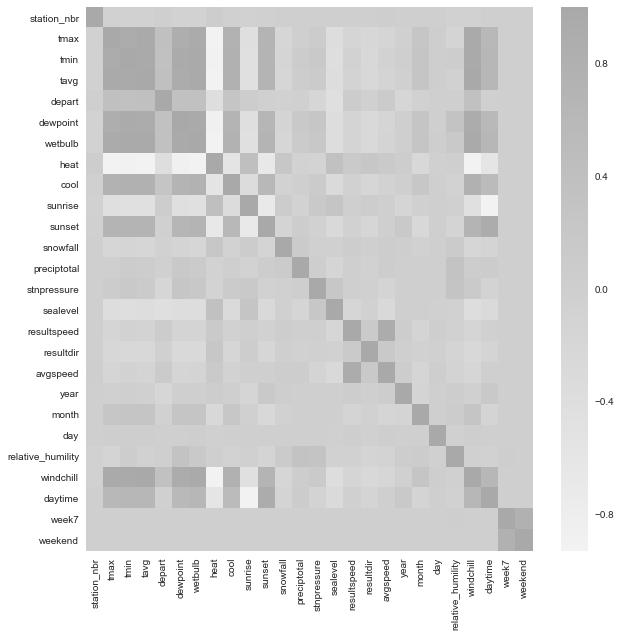

In [52]:
plt.figure(figsize=(10,10))
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(wthr.corr(), annot=False, cmap=cmap)
plt.show()

In [53]:
wthr.to_csv("weather2_180701.csv")